This notebook analyze how COVID-19 spread in south kerea
data until 5pm Mar 7th 2020 EST

In [1]:
#import libraries
library(tidyverse)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [86]:
#import data frames
patient = read_csv('patient.csv')
route = read_csv('route.csv')
time = read_csv('time.csv')
trend = read_csv('trend.csv')
str(patient)

Parsed with column specification:
cols(
  id = col_double(),
  sex = col_character(),
  birth_year = col_double(),
  country = col_character(),
  region = col_character(),
  disease = col_double(),
  group = col_character(),
  infection_reason = col_character(),
  infection_order = col_double(),
  infected_by = col_double(),
  contact_number = col_double(),
  confirmed_date = col_date(format = ""),
  released_date = col_date(format = ""),
  deceased_date = col_date(format = ""),
  state = col_character()
)
Parsed with column specification:
cols(
  id = col_double(),
  date = col_date(format = ""),
  province = col_character(),
  city = col_character(),
  visit = col_character(),
  latitude = col_double(),
  longitude = col_double()
)
Parsed with column specification:
cols(
  date = col_date(format = ""),
  time = col_double(),
  acc_test = col_double(),
  acc_negative = col_double(),
  acc_confirmed = col_double(),
  acc_released = col_double(),
  acc_deceased = col_double(),
  new_tes

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	6767 obs. of  15 variables:
 $ id              : num  1 2 3 4 5 6 7 8 9 10 ...
 $ sex             : chr  "female" "male" "male" "male" ...
 $ birth_year      : num  1984 1964 1966 1964 1987 ...
 $ country         : chr  "China" "Korea" "Korea" "Korea" ...
 $ region          : chr  "filtered at airport" "filtered at airport" "capital area" "capital area" ...
 $ disease         : num  NA NA NA NA NA NA NA NA NA NA ...
 $ group           : chr  NA NA NA NA ...
 $ infection_reason: chr  "visit to Wuhan" "visit to Wuhan" "visit to Wuhan" "visit to Wuhan" ...
 $ infection_order : num  1 1 1 1 1 2 1 1 2 3 ...
 $ infected_by     : num  NA NA NA NA NA 3 NA NA 5 6 ...
 $ contact_number  : num  45 75 16 95 31 17 9 113 2 43 ...
 $ confirmed_date  : Date, format: "2020-01-20" "2020-01-24" ...
 $ released_date   : Date, format: "2020-02-06" "2020-02-05" ...
 $ deceased_date   : Date, format: NA NA ...
 $ state           : chr  "released" "rele

In [13]:
patient %>% head()
nrow(patient)

id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
1,female,1984,China,filtered at airport,NA,NA,visit to Wuhan,1,NA,45,2020-01-20,2020-02-06,NA,released,36
2,male,1964,Korea,filtered at airport,NA,NA,visit to Wuhan,1,NA,75,2020-01-24,2020-02-05,NA,released,56
3,male,1966,Korea,capital area,NA,NA,visit to Wuhan,1,NA,16,2020-01-26,2020-02-12,NA,released,54
4,male,1964,Korea,capital area,NA,NA,visit to Wuhan,1,NA,95,2020-01-27,2020-02-09,NA,released,56
5,male,1987,Korea,capital area,NA,NA,visit to Wuhan,1,NA,31,2020-01-30,2020-03-02,NA,released,33
6,male,1964,Korea,capital area,NA,NA,contact with patient,2,3,17,2020-01-30,2020-02-19,NA,released,56


[1] 6767

##### patient data columns information
id: the ID of the patient (n-th confirmed patient) \
sex: the sex of the patient \
birth_year: the birth year of the patient \
country: the country of the patient  \
region: the region of the patient \
disease: 0: no disease / 1: underlying disease \
group: the collective infection \
infection_reason: the reason of infection \
infection_order: the order of infection \
infected_by: the ID of who has infected the patient \
contact_number: the number of contacts with people \
confirmed_date: the date of confirmation \
released_date: the date of discharge \
deceased_date: the date of decease \
state: isolated / released / deceased 

In [18]:
# transform data types in patient
patient$sex = as.factor(patient$sex)
patient$country = as.factor(patient$country)
patient$region = as.factor(patient$region)
patient$group = as.factor(patient$group)
patient$infection_reason = as.factor(patient$infection_reason)
patient$age = 2020 - patient$birth_year
patient$disease = as.factor(patient$disease)
#view summary 
patient[,-1] %>% summary

     sex         birth_year       country                  region    
 female: 217   Min.   :1929   China   :   8   capital area    : 191  
 male  : 213   1st Qu.:1960   Korea   :6757   Gyeongsangbuk-do: 126  
 NA's  :6337   Median :1974   Mongolia:   1   Daegu           :  53  
               Mean   :1973   NA's    :   1   Daejeon         :  13  
               3rd Qu.:1988                   Gwangju         :  11  
               Max.   :2018                   (Other)         :  24  
               NA's   :6350                   NA's            :6349  
 disease                               group     
 1   :  26   Cheongdo Daenam Hospital     :   9  
 NA's:6741   Eunpyeong St. Mary's Hospital:  13  
             Myungsung church             :   1  
             Onchun Church                :   1  
             Pilgrimage                   :   6  
             Shincheonji Church           :  53  
             NA's                         :6684  
                          infection_reas

### Data Visualization for patient
(may skip some columns with high value of NAs)

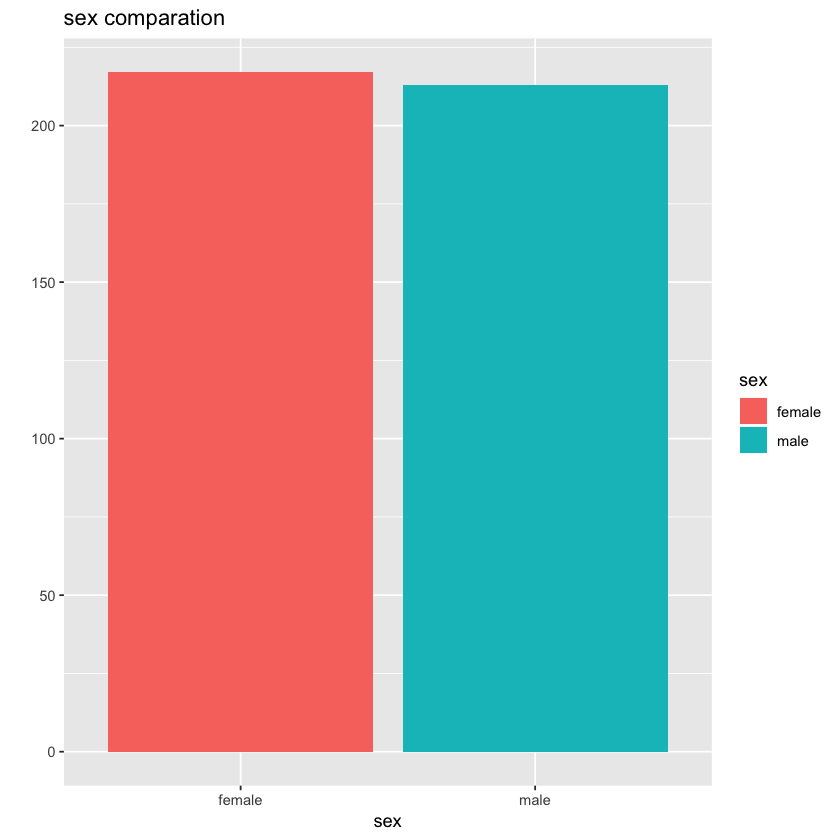

In [85]:
patient %>% filter(!is.na(sex)) %>%
ggplot(aes(x = sex, fill = sex)) + geom_bar() + ggtitle("sex comparation") + ylab("")

From the plot, we can see that there is no influence between sex. However, we could not ignore the big amount NAs in this column.

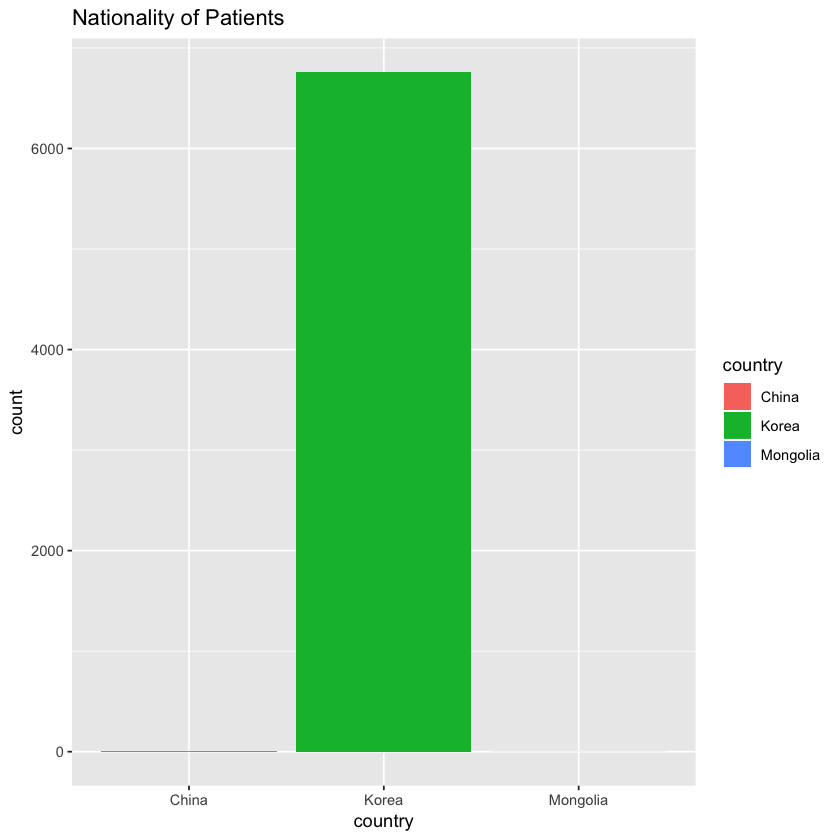

In [38]:
patient %>% filter(!is.na(country)) %>% 
ggplot(aes(x = country, fill = country)) + geom_bar() + 
ggtitle('Nationality of Patients')

Most people affected corona in south Kerea are Kerean.

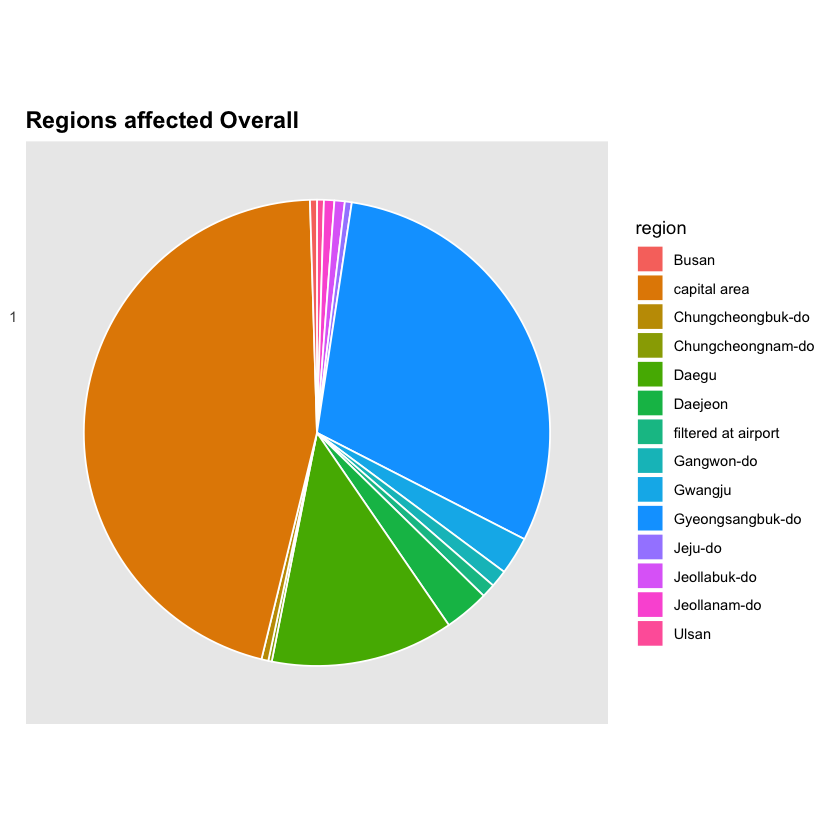

In [37]:
patient %>% filter(!is.na(region)) %>% 
ggplot(aes(x = factor(1), fill = region)) + geom_bar(width = 1, color = "white") +
coord_polar("y") + 
theme(axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
  plot.title=element_text(size=14, face="bold"),
     axis.text.x=element_blank()) + 
ggtitle("Regions affected Overall")

The top 3 regions are capital area, Gyeongsangbuk-do and Daegu.

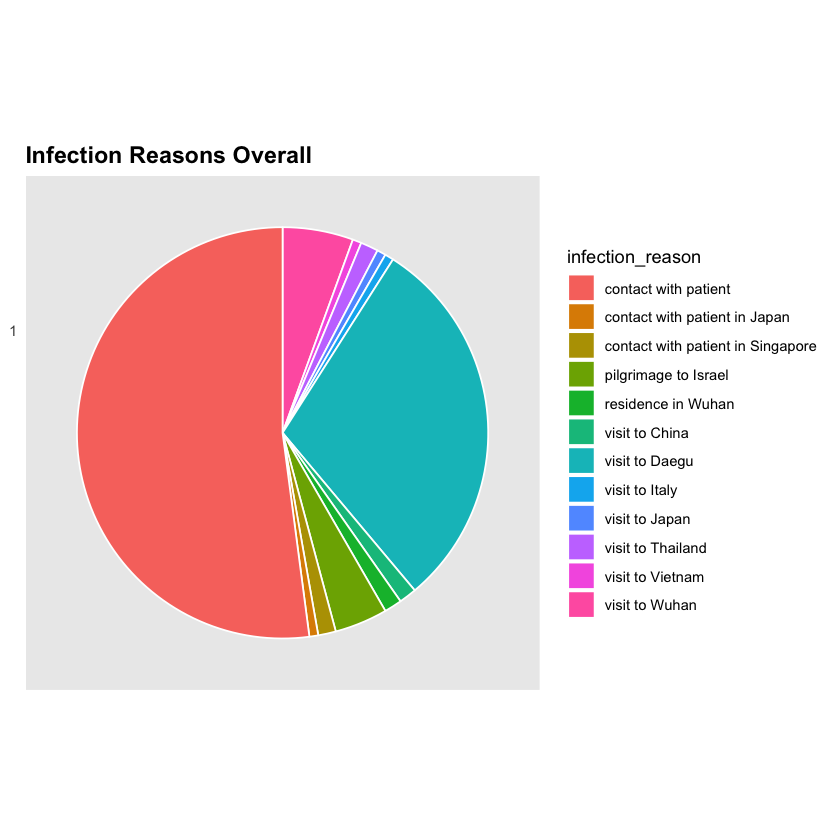

In [40]:
patient %>% filter(!is.na(infection_reason)) %>% 
ggplot(aes(x = factor(1), fill = infection_reason)) + geom_bar(width = 1, color = "white") +
coord_polar("y") + 
theme(axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
  plot.title=element_text(size=14, face="bold"),
     axis.text.x=element_blank()) + 
ggtitle("Infection Reasons Overall")

The top 3 reasons of infection are \
1) contact with patient, \
2) visit to Daegu, \
3) visit to wuhan \
from here we could say that the most effective protecting selves way are staying away from patients (because this virus could infect even in the incubation, just stay away from crowds!) and not visiting serious countries/areas.

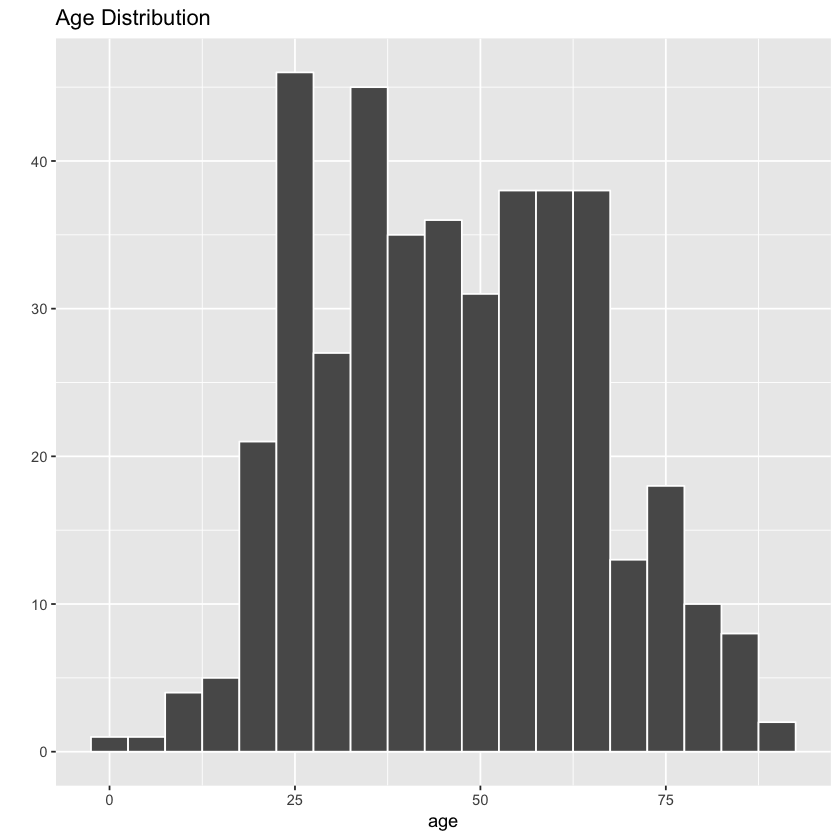

In [75]:
patient %>% filter(!is.na(age)) %>%
arrange(age) %>% 
ggplot(aes(x = age)) + geom_histogram(color = "white", binwidth = 5) +
ggtitle("Age Distribution") + ylab("")

A big amount infected patients are around 20-60 years old. People less than 20 may have a strong immune system to protect themselves. There is an evidence that old infected patients have more opportunities to die. Need other data to say the situation in old people (>60) in south Kerea.

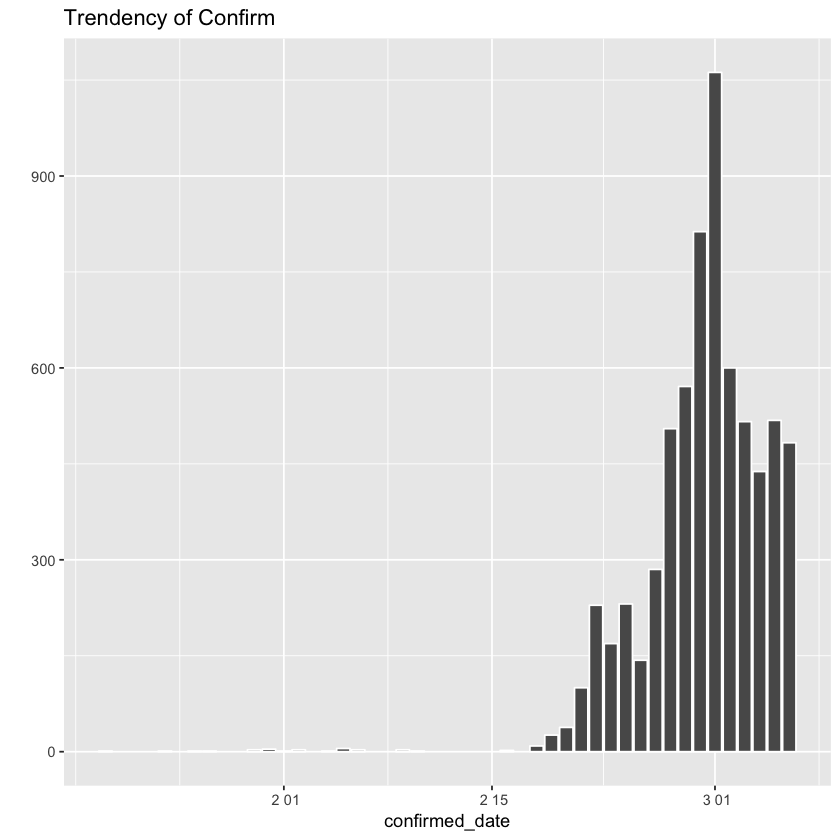

In [77]:
patient %>% filter(!is.na(confirmed_date)) %>%
arrange(confirmed_date) %>% 
ggplot(aes(x = confirmed_date)) + geom_bar(color = "white") +
ggtitle("Trendency of Confirm") + ylab("")

We can see that after 2.17 or 2.18, the confirmed people increase dramatically and 03-01 reached the top. Next we just focus on the situation after 2.16.

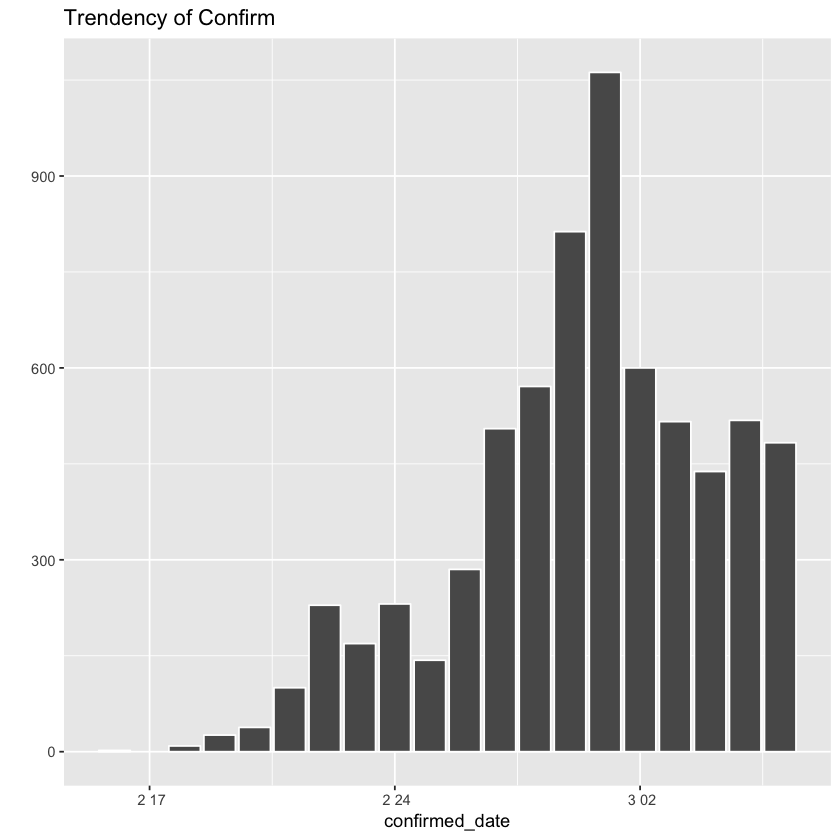

In [84]:
patient %>% filter(!is.na(confirmed_date) & confirmed_date >= as.Date("2020-02-16")) %>%
arrange(confirmed_date) %>% 
ggplot(aes(x = confirmed_date)) + geom_bar(color = "white") +
ggtitle("Trendency of Confirm") + ylab("")

We can see that after 03-01, the confirmed number decreased, which may indicate the infect condition in south Kerea became controled somewhat.